HEART DISEASES PREBICTOR

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [129]:
df = pd.read_csv('heart.csv')

In [130]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [131]:
df.size

14350

In [132]:
# One-hot encoding
df = pd.get_dummies(df, drop_first = True)

In [133]:
X = df.drop('target', axis=1).values
y = df['target'].values.reshape(-1,1)

In [134]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        
    def sigmoid(self, z):
        return 1 / ( 1 + np.exp(-z))
    
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.W = np.zeros((self.n, 1))
        self.b = 0
        self.costs = []
        
        for i in range(self.n_iter):
            z = np.dot(X, self.W) + self.b
            
            A = self.sigmoid(z)
            cost = -np.mean(y * np.log(A + 1e-8) + (1 - y) * np.log(1 - A + 1e-8))
            dW = np.dot(X.T, (A - y)) / self.m
            db = np.mean(A - y)
            
            self.W -= self.lr * dW
            self.b -= self.lr * db
            self.costs.append(cost)
            
            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.4f}")
    
    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        A = self.sigmoid(z)
        return (A > 0.5).astype(int)

In [137]:
model = LogisticRegressionScratch(lr=0.01, n_iter=3000)
model.fit(X_train, y_train)

Iteration 0: Cost = 0.6931
Iteration 100: Cost = 0.5017
Iteration 200: Cost = 0.4337
Iteration 300: Cost = 0.4012
Iteration 400: Cost = 0.3826
Iteration 500: Cost = 0.3707
Iteration 600: Cost = 0.3625
Iteration 700: Cost = 0.3565
Iteration 800: Cost = 0.3520
Iteration 900: Cost = 0.3485
Iteration 1000: Cost = 0.3458
Iteration 1100: Cost = 0.3435
Iteration 1200: Cost = 0.3417
Iteration 1300: Cost = 0.3401
Iteration 1400: Cost = 0.3388
Iteration 1500: Cost = 0.3377
Iteration 1600: Cost = 0.3368
Iteration 1700: Cost = 0.3360
Iteration 1800: Cost = 0.3353
Iteration 1900: Cost = 0.3347
Iteration 2000: Cost = 0.3342
Iteration 2100: Cost = 0.3337
Iteration 2200: Cost = 0.3333
Iteration 2300: Cost = 0.3329
Iteration 2400: Cost = 0.3326
Iteration 2500: Cost = 0.3323
Iteration 2600: Cost = 0.3320
Iteration 2700: Cost = 0.3318
Iteration 2800: Cost = 0.3316
Iteration 2900: Cost = 0.3314


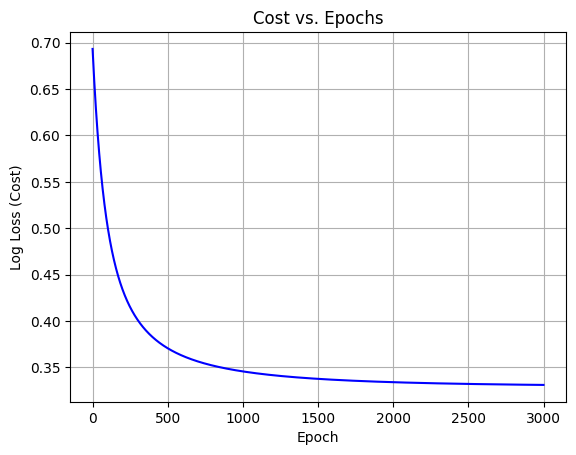

In [138]:
plt.plot(range(len(model.costs)), model.costs, color='blue')
plt.title('Cost vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Log Loss (Cost)')
plt.grid(True)
plt.show()

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy:  0.7902439024390244
Precision:  0.7459016393442623
Recall:  0.883495145631068
F1 Score:  0.8088888888888889

Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.70      0.77       102
           1       0.75      0.88      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205



Iteration 0: Cost = 0.6931
Iteration 100: Cost = 0.5122
Iteration 200: Cost = 0.4515
Iteration 300: Cost = 0.4248
Iteration 400: Cost = 0.4109
Iteration 500: Cost = 0.4029
Iteration 600: Cost = 0.3980
Iteration 700: Cost = 0.3948
Iteration 800: Cost = 0.3926
Iteration 900: Cost = 0.3911
Iteration 1000: Cost = 0.3901
Iteration 1100: Cost = 0.3894
Iteration 1200: Cost = 0.3888
Iteration 1300: Cost = 0.3884
Iteration 1400: Cost = 0.3881
Iteration 1500: Cost = 0.3879
Iteration 1600: Cost = 0.3877
Iteration 1700: Cost = 0.3876
Iteration 1800: Cost = 0.3875
Iteration 1900: Cost = 0.3874
Iteration 2000: Cost = 0.3874
Iteration 2100: Cost = 0.3873
Iteration 2200: Cost = 0.3873
Iteration 2300: Cost = 0.3873
Iteration 2400: Cost = 0.3873
Iteration 2500: Cost = 0.3872
Iteration 2600: Cost = 0.3872
Iteration 2700: Cost = 0.3872
Iteration 2800: Cost = 0.3872
Iteration 2900: Cost = 0.3872


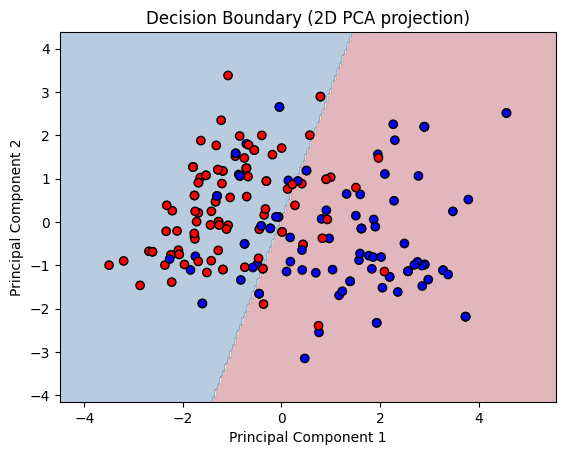

In [140]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

model_2d = LogisticRegressionScratch(lr=0.01, n_iter=3000)
model_2d.fit(X_train_2d, y_train)

x_min, x_max = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1
y_min, y_max = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model_2d.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test.ravel(), cmap='bwr', edgecolors='k')
plt.title("Decision Boundary (2D PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [141]:
import numpy as np

def gini_index(groups, classes):
    n_instances = sum([len(group) for group in groups])
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        _, y = zip(*group)
        for class_val in classes:
            p = y.count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

def test_split(index, value, dataset):
    left, right = [], []
    for row in dataset:
        if row[0][index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

def get_split(dataset):
    class_values = list(set(row[1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0][0])):
        for row in dataset:
            groups = test_split(index, row[0][index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[0][index], gini, groups
    return {'index': b_index, 'value': b_value, 'groups': b_groups}

In [142]:
def to_terminal(groups):
    outcomes = [row[1] for row in groups]
    return max(set(outcomes), key=outcomes.count)

def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return 
    
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
        
    if(len(right) <= min_size):
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)
    

In [143]:
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']
            

In [144]:
import random
from collections import Counter

def subsample(dataset, ratio):
    sample = []
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = random.randrange(len(dataset))
        sample.append(dataset[index])
    return sample

def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return Counter(predictions).most_common(1)[0][0]

def random_forest(train, test, max_depth, min_size, sample_size, n_trees):
    trees = []
    for _ in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size)
        trees.append(tree)
        
    predictions = [bagging_predict(trees, row[0]) for row in test]
    actuals = [row[1] for row in test]
    accuracy = sum([1 for i in range(len(predictions)) if predictions[i] == actuals[i]]) / len(actuals)
    print(f" Random Forest Accuracy: {accuracy * 100:.2f}%")
    return predictions, actuals

In [145]:
data = list(zip(X_train, y_train.ravel()))
test = list(zip(X_test, y_test.ravel()))

In [146]:
preds, trues = random_forest(
    train = data,
    test = test,
    max_depth = 10,
    min_size = 5,
    sample_size = 0.8,
    n_trees = 10
)

 Random Forest Accuracy: 97.56%


Random Forest Accuracy: 0.9756
Random Forest Precision: 1.0000
Random Forest Recall: 0.9515
Random Forest F1 Score: 0.9751

Detailed Classification Report: 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       102
           1       1.00      0.95      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



<Figure size 600x400 with 0 Axes>

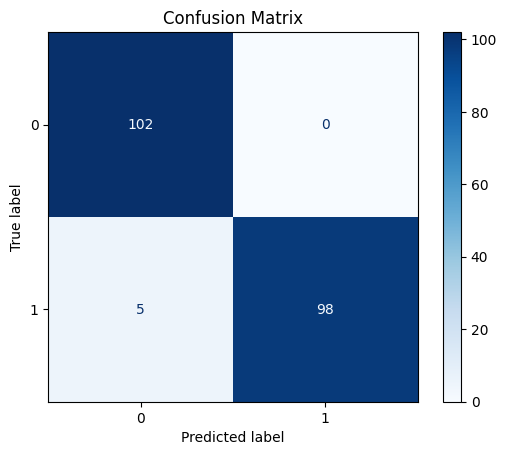

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(trues, preds)
precision = precision_score(trues, preds)
recall = recall_score(trues, preds)
f1 = f1_score(trues, preds)

print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest Precision: {precision:.4f}")
print(f"Random Forest Recall: {recall:.4f}")
print(f"Random Forest F1 Score: {f1:.4f}")

print("\nDetailed Classification Report: \n")
print(classification_report(trues, preds))

cm = confusion_matrix(trues, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [152]:
import numpy as np
from collections import Counter

class KNearestNeighborsScratch:
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X_test):
        y_pred = []
        for test_point in X_test:
            distances = np.linalg.norm(self.X_train - test_point, axis=1)
            
            k_indices = distances.argsort()[:self.k]
            
            k_labels = self.y_train[k_indices]
            
            most_common = Counter(k_labels).most_common(1)[0][0]
            y_pred.append(most_common)
        return np.array(y_pred)
    

In [153]:
knn = KNearestNeighborsScratch(k=5)
knn.fit(X_train, y_train.ravel())
y_pred_knn = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.8341463414634146


In [154]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print(f"KNN Accuracy: {accuracy:.4f}")
print(f"KNN Precision: {precision:.4f}")
print(f"KNN Recall: {recall:.4f}")
print(f"KNN F1 Score: {f1:.4f}")

print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8341
KNN Precision: 0.8000
KNN Recall: 0.8932
KNN F1 Score: 0.8440

Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



In [155]:
import numpy as np

def gini_index(groups, classes):
    n_instances = sum([len(group) for group in groups])
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        labels = [row[-1] for row in group]
        for class_val in classes:
            p = labels.count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

In [156]:
 def test_split(index, value, dataset):
    left, right = [], []
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

In [157]:
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = None, None, float('inf'), None
    for index in range(len(dataset[0]) - 1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index': b_index, 'value': b_value, 'groups': b_groups}

In [158]:
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

In [159]:
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])

    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return

    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return

    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)

    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

In [160]:
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

In [161]:
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

In [162]:
train_data = [list(x) + [y] for x, y in zip(X_train, y_train.ravel())]
test_data = [list(x) + [y] for x, y in zip(X_test, y_test.ravel())]

tree = build_tree(train_data, max_depth=10, min_size=5)

predictions = [predict(tree, row) for row in test_data]

from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy:", accuracy_score(y_test, predictions))

Decision Tree Accuracy: 0.9658536585365853


In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Decision Tree Accuracy:  {accuracy:.4f}")
print(f"Decision Tree Precision: {precision:.4f}")
print(f"Decision Tree Recall:    {recall:.4f}")
print(f"Decision Tree F1 Score:  {f1:.4f}")

print("\nDetailed Classification Report:\n")
print(classification_report(y_test, predictions))

Decision Tree Accuracy:  0.9659
Decision Tree Precision: 0.9800
Decision Tree Recall:    0.9515
Decision Tree F1 Score:  0.9655

Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       102
           1       0.98      0.95      0.97       103

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

